# Assignment Lab 10 - Nicolas Duboc

In [1]:
import context
from IPython.display import Image
import matplotlib.pyplot as plt
# make the plots happen inline
%matplotlib inline
# import the numpy array handling library
import numpy as np
# import the advection code from the numlabs directory
import numlabs.lab10.advection_funs_nic as afs

******************************
context imported. Front of path:
/Users/nduboc/repos/numeric_2024
back of path: /Users/nduboc/opt/miniconda3/envs/numeric_2024/lib/python3.12/site-packages
******************************

through /Users/nduboc/repos/numeric_2024/notebooks/lab10/context.py


## part a

Since the problem is pure advection, our accuracy will be measured by how well the amplitude of the gaussian distribution of water vapor is preserved by the end of the simulation. Below are 4 plots representing 4 different polynomial approximations with a Courant Number of 0.4: 

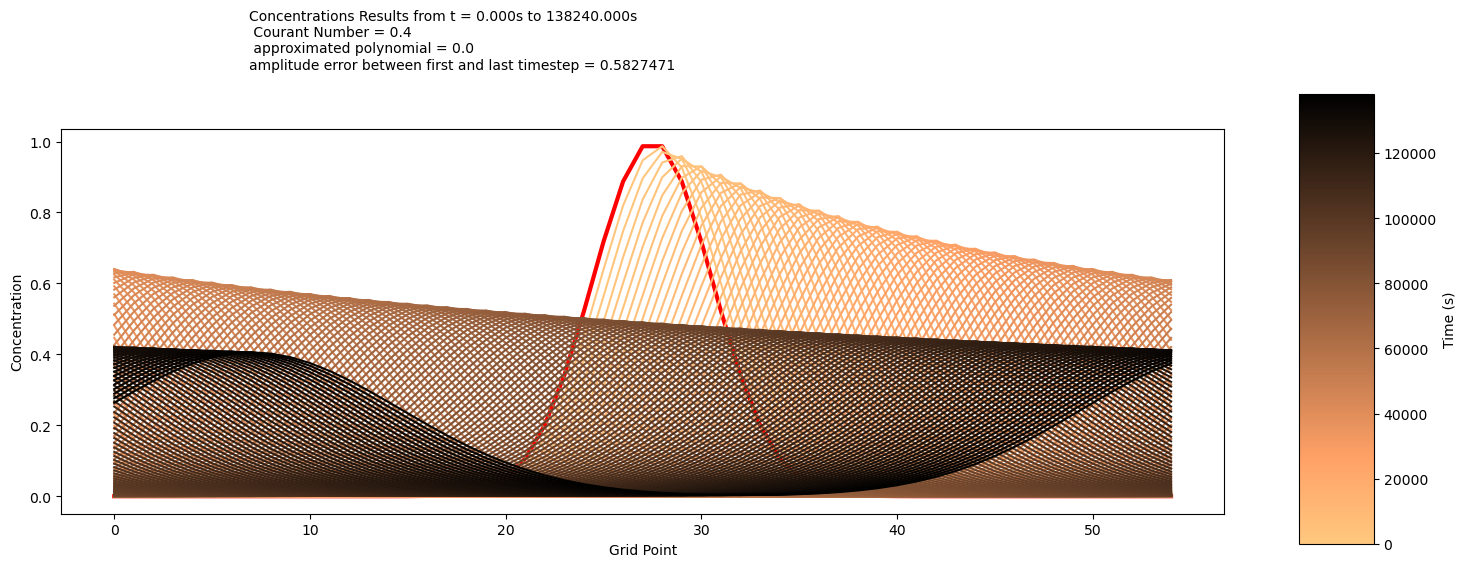

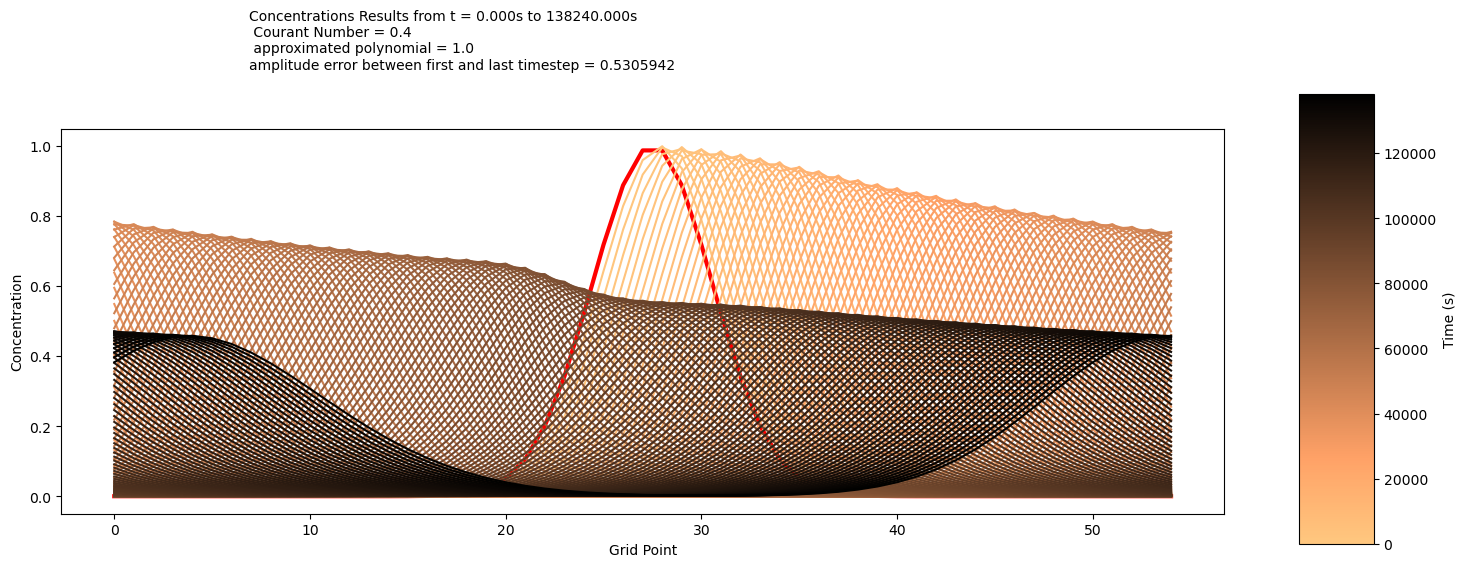

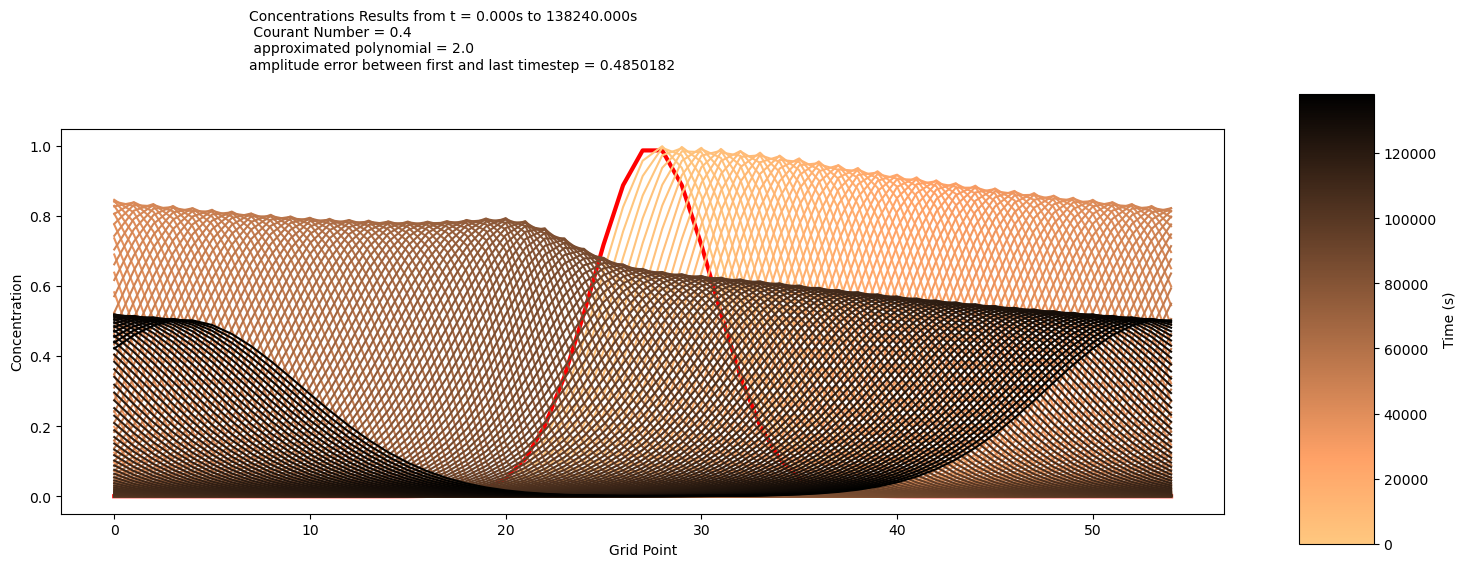

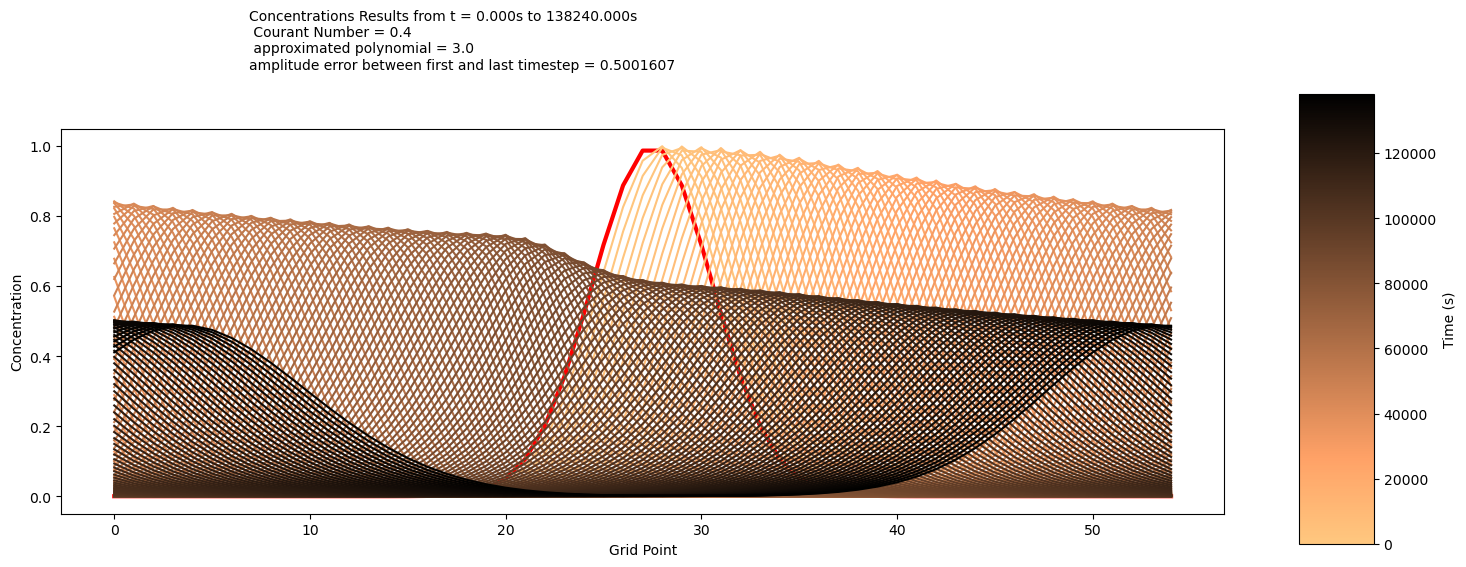

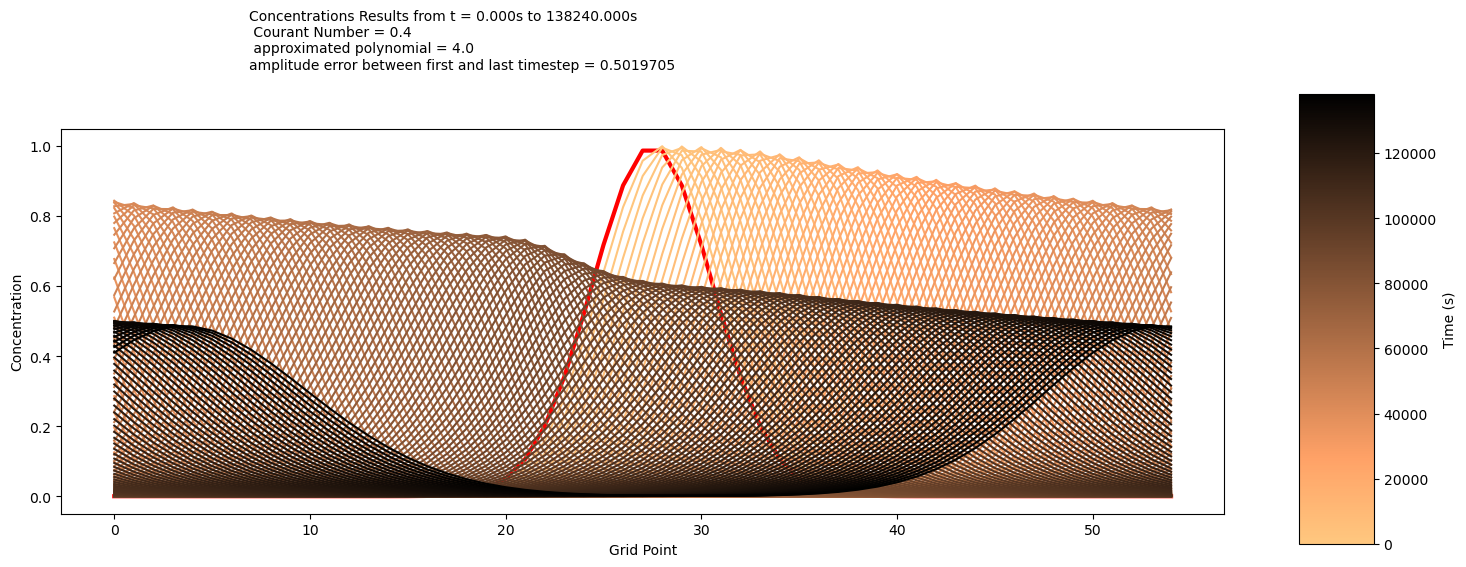

In [4]:
ms = np.empty((5,201,55))
for i in range(5):
    ms[i,:,:] = afs.advection3(200, i, 0.4,'right')
    # errors.append(abs(np.max(ms[i,-1,:])-np.max(ms[i,0,:])))

The Botts scheme shows that the error in amplitude between the first and last timesteps decreases with an increasing polynomial approximation. However, the error differences between $l=2$ through $l=4$ are very small. Below are plots with a lower courant number. 

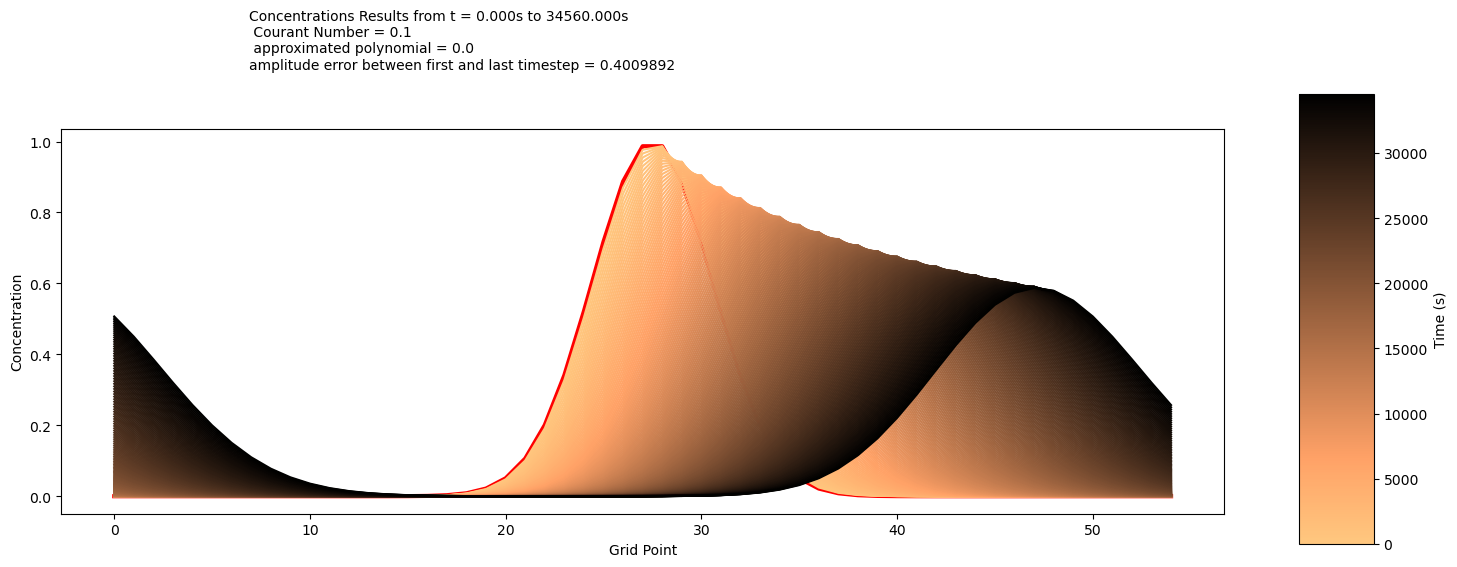

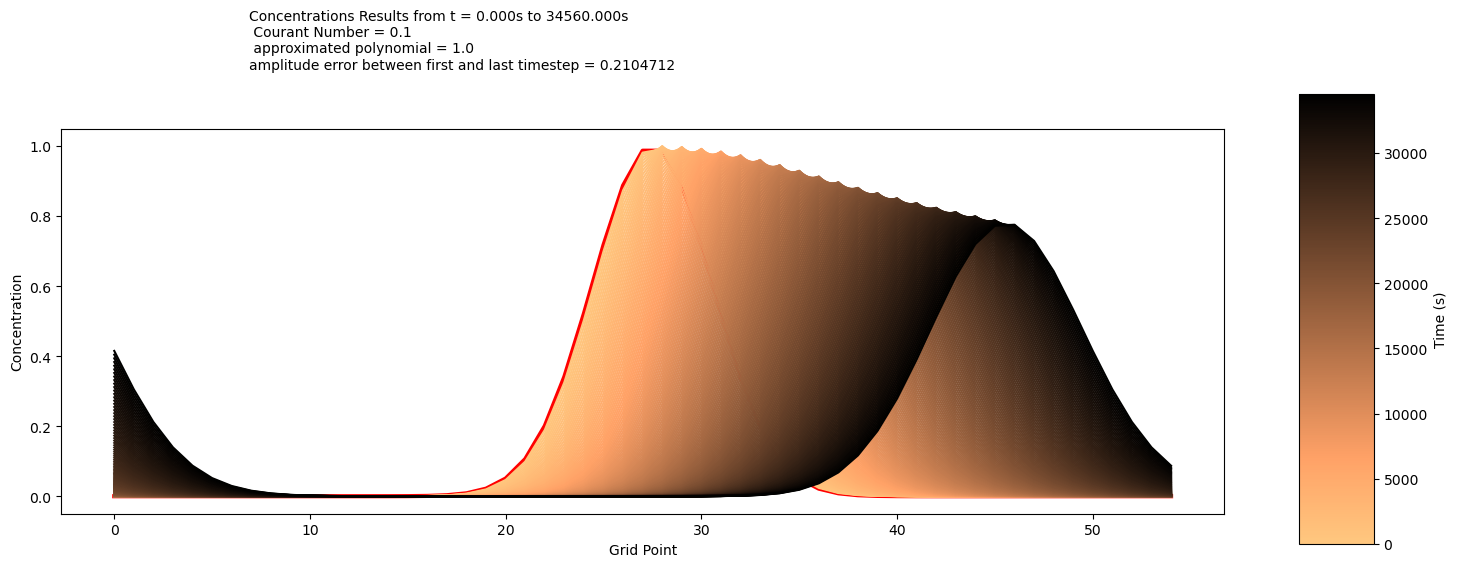

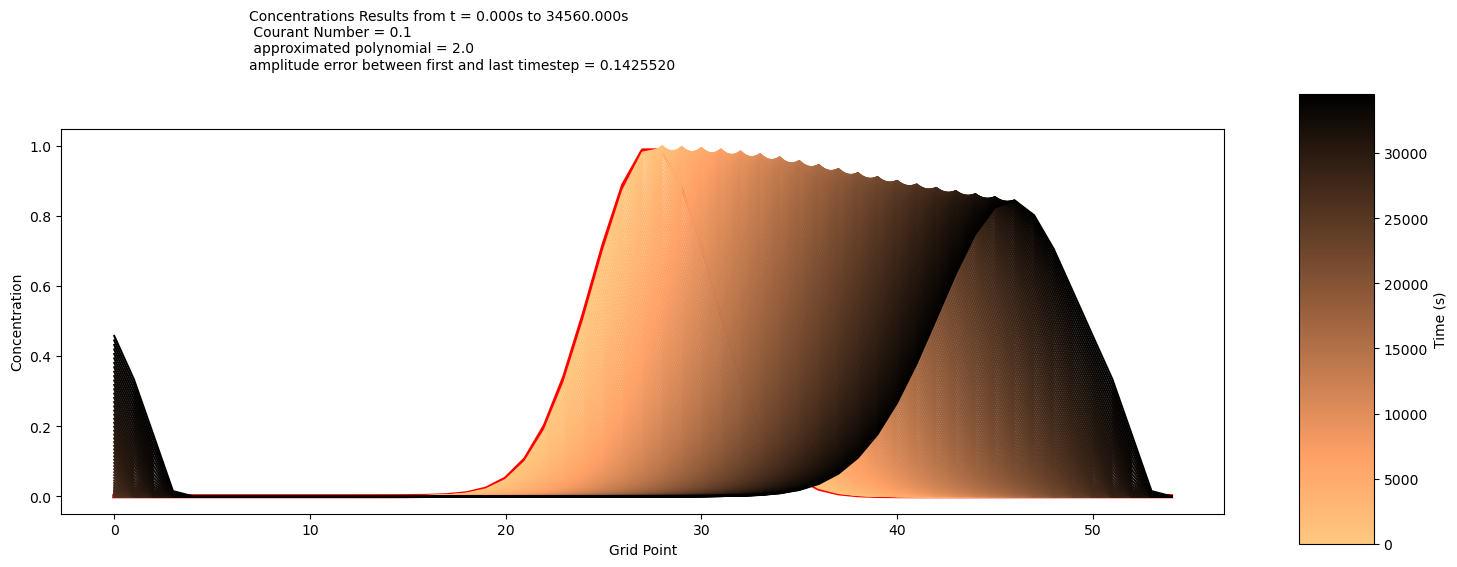

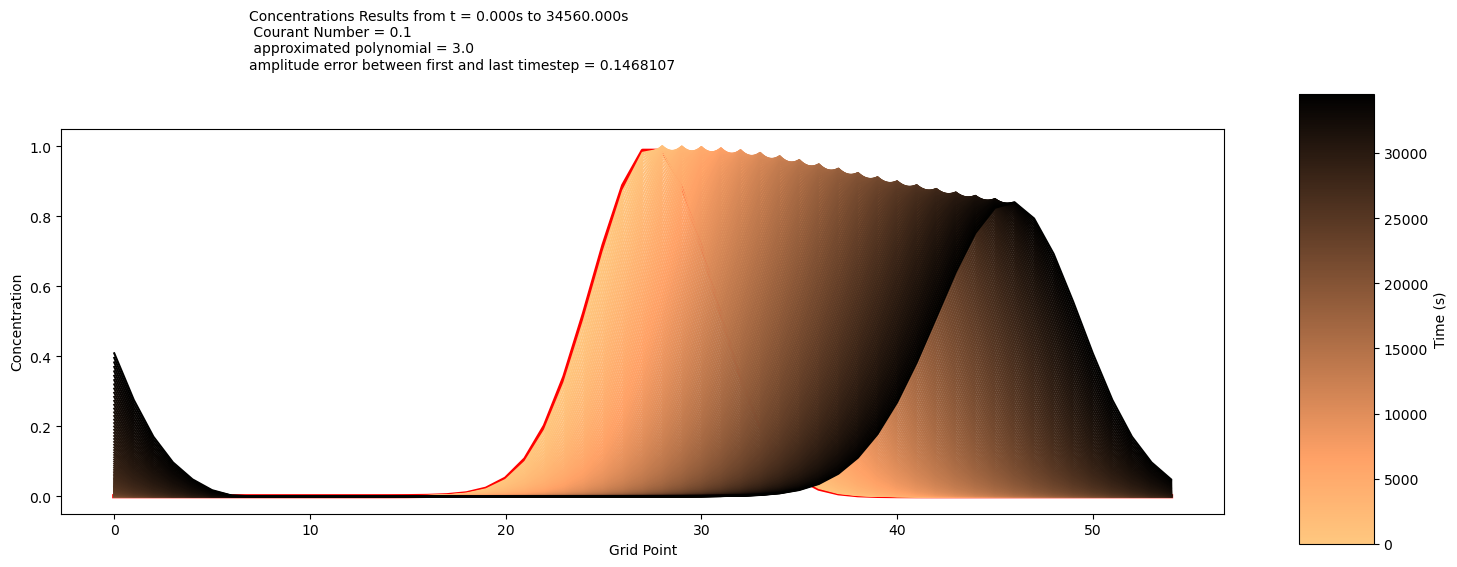

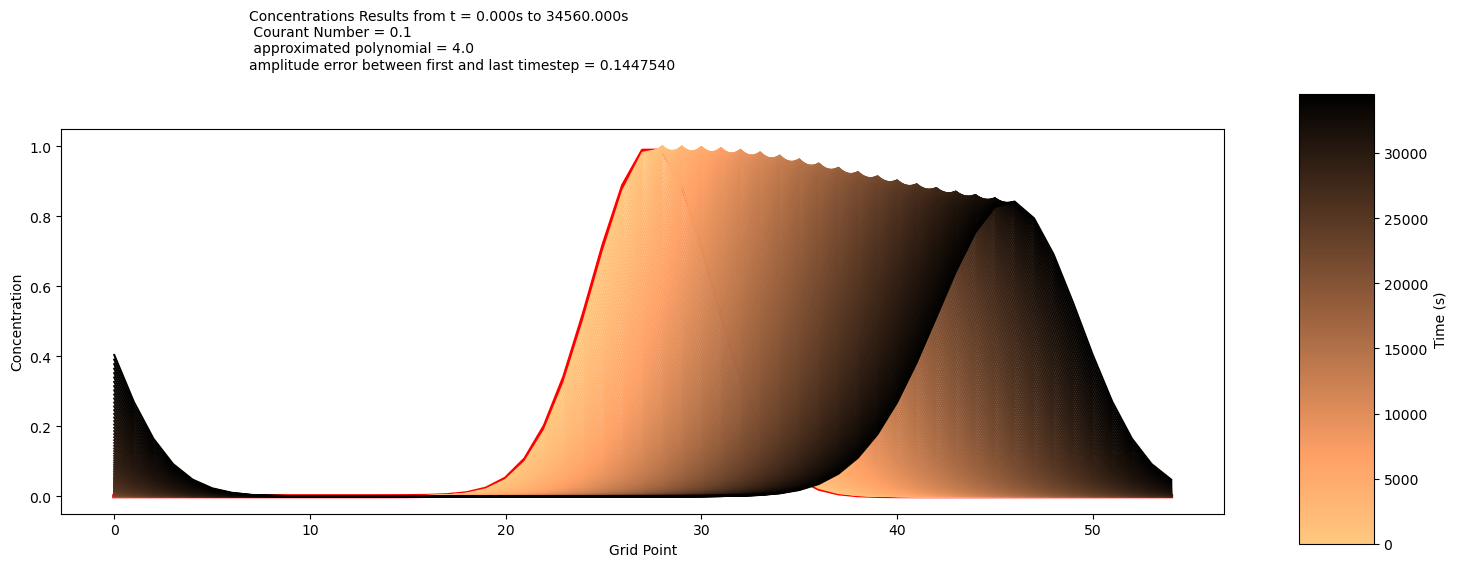

In [6]:
ms1 = np.empty((5,201,55))
for i in range(5):
    ms1[i,:,:] = afs.advection3(200, i, 0.1,'right')

This set of  plots show that decreasing the courant number actually decreases the error, If only slightly. For example, in the previous set of plots the error for using a polynomial approximation of $l = 0$ has an error of approximately $0.3346$, while the same approximation at a lower courant number has an error of approximately $0.1749$. At a constant $\partial x$  and $u$, a lower courant number is representative of a smaller $\partial t$. The courant condition is defined as: 

$$C_{max} \le u \frac{\partial t}{\partial x}$$

Where $C_{max}$ is the maximum courant number that ensures the scheme remains stable. Therefore, a smaller courant number (similarly, a small value of $\partial t$) will be more stable.



## part b

Below are plots using a courant number of $Cr = 0.1$ for a polynomial approximation of $l=1$ and $l=3$. These approximations use the extra point to the left of the centred grid point.

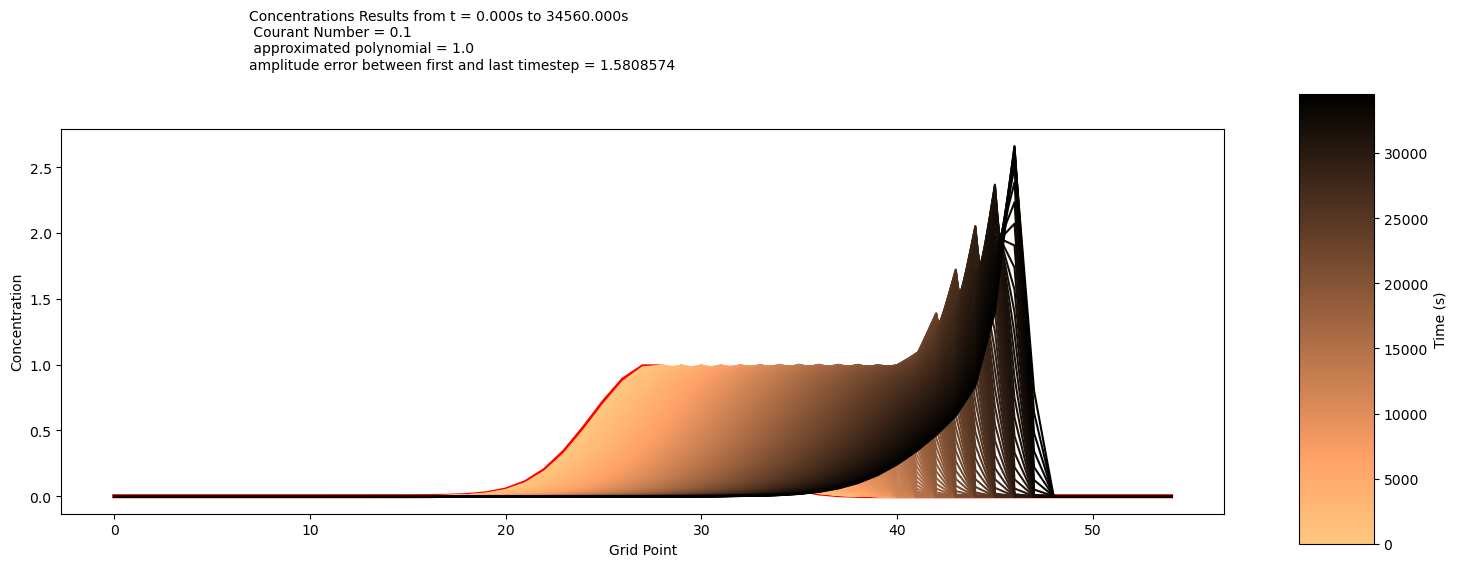

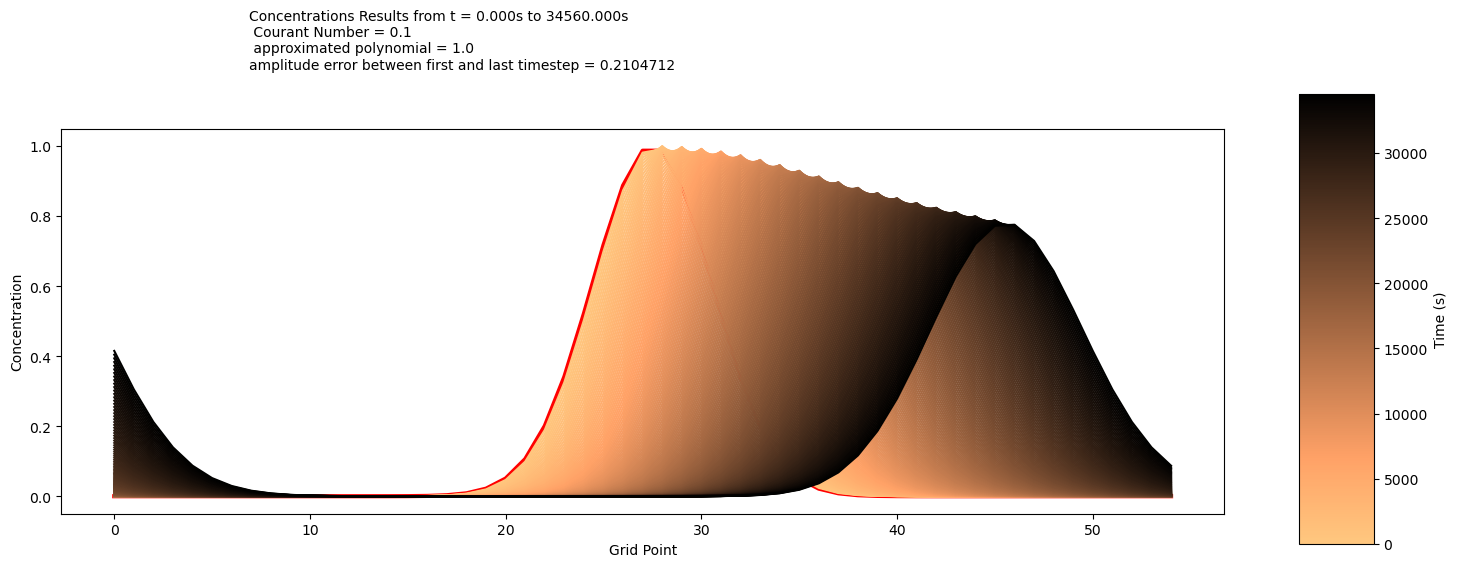

In [9]:
ms2 = afs.advection3(200, 1, 0.1,'left')
ms3 = afs.advection3(200, 1, 0.1,'right')

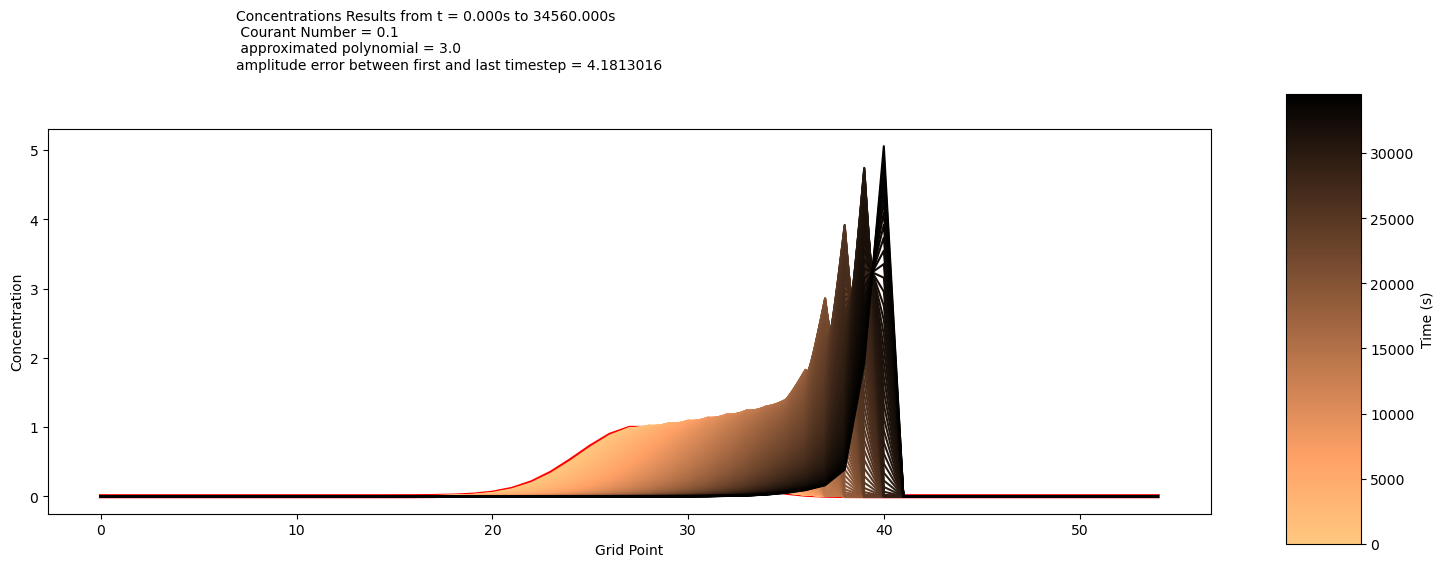

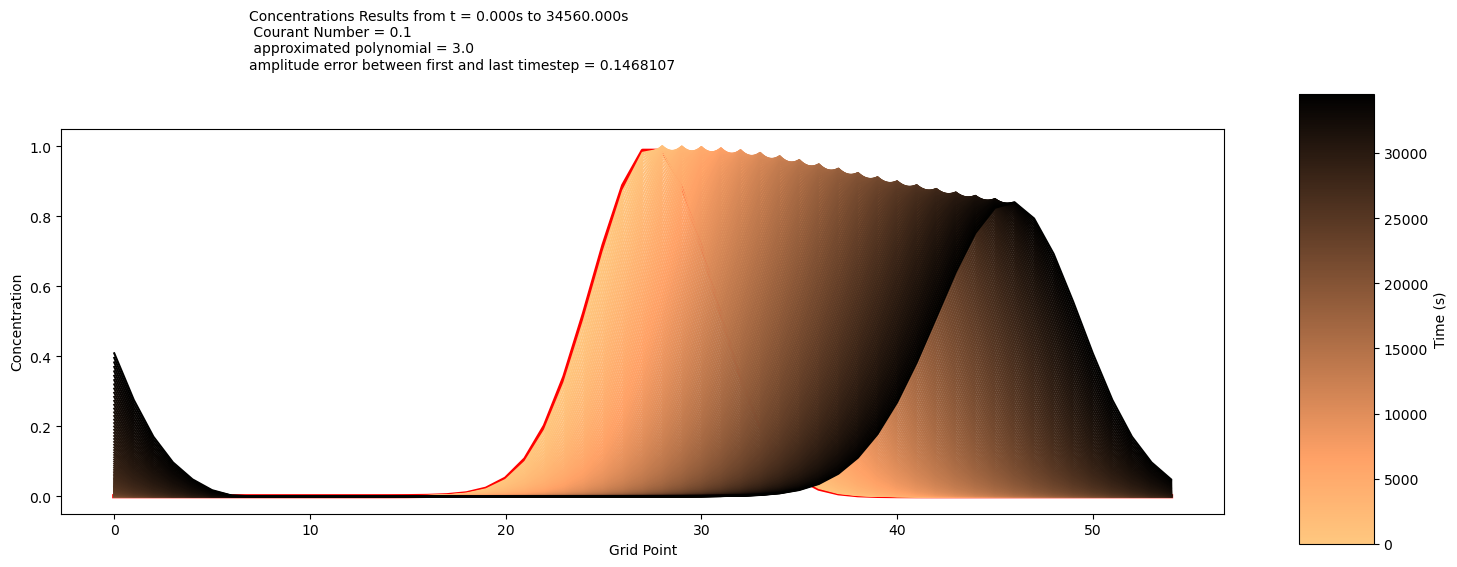

In [12]:
ms4 = afs.advection3(200, 3, 0.1,'left')
ms4 = afs.advection3(200, 3, 0.1,'right')

The plots above represent 4 different scenarios using 2 different polynomial approximations $l=1$ and $l=3$. For both scenarios, the solution blows up after a number of timesteps using the extra point to the left of the centred grid point. $l=3$ has a significantly larger blow up than $l=1$. 